In [1]:
# 解决jupyter notebook使用matplotlib画图时内核挂掉的问题
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print(torch.__version__)
print(torch.cuda.is_available())

2.0.0
True


Text(0, 0.5, 'y')

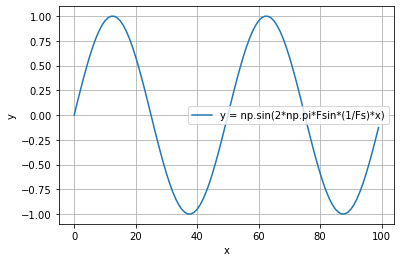

In [50]:
# Just an illustration for how to use matplotlib.pyplot for plotting
fig, ax = plt.subplots(figsize=(6,4))  # Create a figure containing a single axes.
x    = np.arange(100)
Fs   = 100  # 100Hz sampling rate
Fsin = 2    # 2Hz 
y = np.sin(2*np.pi*Fsin*(1/Fs)*x)
ax.plot(x, y, label='y = np.sin(2*np.pi*Fsin*(1/Fs)*x)')  # Plot some data on the axes.
ax.grid()
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

## Tensor

In [4]:
x = torch.arange(10)
print(x,x.shape,x.numel())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) torch.Size([10]) 10


In [5]:
y = torch.rand(3,4)
print(y.shape, y.numel()) # number of elements
print(y,'\n', y.reshape(2,-1))

torch.Size([3, 4]) 12
tensor([[0.8237, 0.8905, 0.0953, 0.5713],
        [0.7150, 0.2870, 0.8049, 0.0171],
        [0.7921, 0.3614, 0.6853, 0.3061]]) 
 tensor([[0.8237, 0.8905, 0.0953, 0.5713, 0.7150, 0.2870],
        [0.8049, 0.0171, 0.7921, 0.3614, 0.6853, 0.3061]])


In [7]:
a = torch.zeros(2,3,4)
b = torch.ones((2,3,4)) # shape can also be specified using tuple
c = torch.zeros_like(a)
print(a, a.shape, a.numel())
print(b)
print(c)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]) torch.Size([2, 3, 4]) 24
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
cpu


NameError: name 'gpu' is not defined

### 查询device属性，以及变更device属性

In [10]:
print(a.device)
device = torch.device ( "cuda:0" if torch.cuda.is_available () else "cpu")
a = a.to(device)
print(a.device)

cpu
cuda:0


### 创建并初始化新的tensor的方法

In [13]:
a = torch.zeros(2,3,4)
b = torch.zeros_like(a)
c = torch.ones_like(a)
d = torch.randn_like(a)
print(a,'\n',b,'\n',c,'\n',d)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]) 
 tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]) 
 tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]) 
 tensor([[[ 0.7610, -0.0260, -1.0136, -0.3974],
         [-0.7095,  1.4060,  0.9631,  0.2820],
         [ 0.3941,  0.2859, -0.5973, -0.8829]],

        [[-1.2867,  0.3216, -0.8913,  0.1164],
         [ 0.2412, -0.1038,  0.4152, -0.5754],
         [-1.5712,  0.1292, -0.2891, -0.7120]]])


## Random data generation

In [7]:
x = torch.rand(100000) # uniform distribution
y = torch.randn(100000) # normal or gaussian distribution
torch.histogram(x=x,bins=20,density=True)

torch.return_types.histogram(
hist=tensor([0.9890, 0.9994, 0.9996, 0.9992, 1.0230, 1.0088, 0.9796, 1.0088, 1.0010,
        1.0110, 0.9932, 1.0138, 1.0014, 0.9932, 1.0004, 1.0090, 0.9980, 0.9978,
        0.9898, 0.9840]),
bin_edges=tensor([1.3411e-05, 5.0013e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01, 2.5001e-01,
        3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01, 5.0000e-01, 5.5000e-01,
        6.0000e-01, 6.5000e-01, 7.0000e-01, 7.5000e-01, 8.0000e-01, 8.5000e-01,
        9.0000e-01, 9.5000e-01, 1.0000e+00]))

(array([0.00121511, 0.        , 0.00243023, 0.        , 0.00121512,
        0.00121511, 0.00121511, 0.00121512, 0.        , 0.        ,
        0.00364535, 0.00243023, 0.00121511, 0.00486045, 0.00850582,
        0.00850579, 0.01093602, 0.01336629, 0.02430227, 0.01944181,
        0.01944187, 0.04252897, 0.04617431, 0.04495932, 0.05103476,
        0.06804645, 0.05346499, 0.08384294, 0.08991852, 0.09720907,
        0.13609289, 0.13244736, 0.17497658, 0.17983704, 0.18469723,
        0.21750561, 0.24059262, 0.24545325, 0.26124956, 0.27826116,
        0.31835993, 0.33901712, 0.32686573, 0.37790067, 0.37425519,
        0.35967395, 0.38883663, 0.38519128, 0.42893541, 0.3864064 ,
        0.38762151, 0.42407495, 0.38519135, 0.38154587, 0.36331929,
        0.37304021, 0.34509244, 0.31835993, 0.27704625, 0.25881933,
        0.26246468, 0.25031372, 0.21629018, 0.21629049, 0.17011612,
        0.15674962, 0.11057548, 0.11422082, 0.1093602 , 0.08384294,
        0.09842418, 0.07898248, 0.0486046 , 0.04

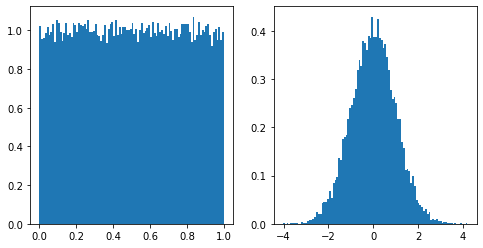

In [14]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].hist(x.numpy(),100,density=True) # ax.hist(x) is NG, must convert to numpy array first to use ax.hist
ax[1].hist(y.numpy(),100,density=True)

(array([0.11144444, 0.11766667, 0.11044444, 0.10944444, 0.10711111,
        0.11044444, 0.11833333, 0.11277778, 0.10533333, 0.10811111]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

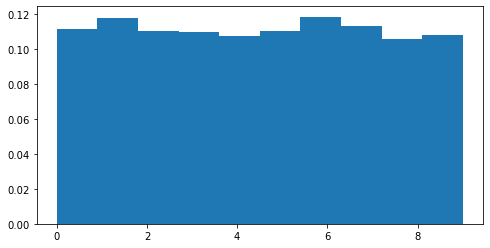

In [30]:
z = torch.randint(10, (10000,)) # uniform distribution of intergers in the specified range
fig,ax = plt.subplots(figsize=(8,4))
ax.hist(z.numpy(),10,density=True)

(array([0.00226765, 0.00680295, 0.01672391, 0.03741624, 0.07653317,
        0.1309568 , 0.21882829, 0.30414854, 0.33958062, 0.40420866,
        0.37529612, 0.33164385, 0.23668599, 0.17035722, 0.09864279,
        0.04762064, 0.02409379, 0.0090706 , 0.00198419, 0.00170074]),
 array([-3.413898  , -3.0611098 , -2.7083218 , -2.3555336 , -2.0027456 ,
        -1.6499574 , -1.2971693 , -0.9443813 , -0.59159315, -0.23880507,
         0.11398304,  0.46677113,  0.8195592 ,  1.1723473 ,  1.5251354 ,
         1.8779235 ,  2.2307117 ,  2.5834997 ,  2.9362879 ,  3.2890759 ,
         3.641864  ], dtype=float32),
 <BarContainer object of 20 artists>)

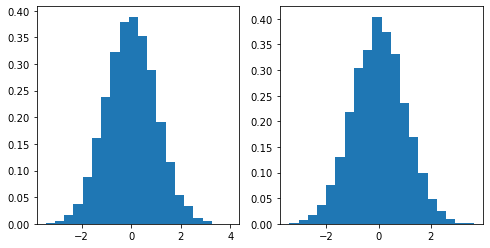

In [34]:
# torch.normal is (almost?) the same as torch.randn()
z1 = torch.normal(mean=0.,std=1.,size=(10000,))
z2 = torch.randn(10000)
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].hist(z1.numpy(),20,density=True) # ax.hist(x) is NG, must convert to numpy array first to use ax.hist
ax[1].hist(z2.numpy(),20,density=True)

## 基本运算，element-wise运算

In [39]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y, torch.exp(x), x > y  # **运算符是求幂运算. Here all are element-wise operation

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]),
 tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03]),
 tensor([False, False,  True,  True]))

## Concatenate

dim=0就是第1层（最外层），dim=1就是第2，。。。

沿dim=0串接的效果是shape[0]等于两个输入的shape[0]之和，shape的其它成员值保持不变。或者说，轴0的长度变为两个输入张量的轴0长度之和，其余轴长度不变。

沿dim=1串接的效果是shape[1]等于两个输入的shape[1]之和，shape的其它成员值保持不变。或者说，轴1的长度变为两个输入张量的轴1长度之和，其余轴长度不变。

In [38]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [41]:
print(X.sum())
print(X.prod())

tensor(66.)
tensor(0.)


## 广播机制

在相同形状的两个张量上执行按元素操作。 在某些情况下，即使形状不同，我们仍然可以通过调用 广播机制（broadcasting mechanism）来执行按元素操作。 这种机制的工作方式如下：

通过适当复制元素来扩展一个或两个数组，以便在转换之后，两个张量具有相同的形状；

对生成的数组执行按元素操作。

在大多数情况下，我们将沿着数组中长度为1的轴进行广播，

In [51]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
print(a, b, a+b)

tensor([[0],
        [1],
        [2]]) tensor([[0, 1]]) tensor([[0, 1],
        [1, 2],
        [2, 3]])


## 索引和切片

就像在任何其他Python数组中一样，张量中的元素可以通过索引访问。 与任何Python数组一样：第一个元素的索引是0，最后一个元素索引是-1； 可以指定范围以包含第一个元素和最后一个之前的元素。

除了读取，也可以通过索引和切片进行赋值。

## 节省内存, in-place operation

运行一些操作可能会导致为新结果分配内存。 例如，如果我们用Y = X + Y，我们将取消引用Y指向的张量，而是指向新分配的内存处的张量。

在下面的例子中，我们用Python的id()函数演示了这一点， 它给我们提供了内存中引用对象的确切地址。 运行Y = Y + X后，我们会发现id(Y)指向另一个位置。 这是因为Python首先计算Y + X，为结果分配新的内存，然后使Y指向内存中的这个新位置。

In [53]:
before = id(Y)
Y = Y + X
print(before, id(Y), id(Y) == before)

2294432040176 2294431988688 False


这可能是不可取的，原因有两个：

首先，我们不想总是不必要地分配内存。在机器学习中，我们可能有数百兆的参数，并且在一秒内多次更新所有参数。通常情况下，我们希望原地执行这些更新；

如果我们不原地更新，其他引用仍然会指向旧的内存位置，这样我们的某些代码可能会无意中引用旧的参数。

幸运的是，执行原地操作非常简单。 我们可以使用切片表示法将操作的结果分配给先前分配的数组，例如Y[:] = <expression>。 另一种方法是采用 Y += <expression>的形式进行赋值更新。

In [55]:
before = id(Y)
Y[:] = Y + X
print(before, id(Y), id(Y) == before)
Y += X
print(before, id(Y), id(Y) == before)

2294431988688 2294431988688 True
2294431988688 2294431988688 True


## 转换为其他Python对象

将深度学习框架定义的张量转换为NumPy张量（ndarray）很容易，反之也同样容易。 torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量。

要将大小为1的张量转换为Python标量，我们可以调用item函数或Python的内置函数。

In [58]:
A = X.numpy()
B = torch.tensor(A)
print(type(A), type(B))

a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

<class 'numpy.ndarray'> <class 'torch.Tensor'>


(tensor([3.5000]), 3.5, 3.5, 3)

In [4]:
a = torch.tensor([2, 3, 4])
b = torch.tensor([3, 4, 5])
print("a + b: ", (a + b).numpy())
print("a - b: ", (a - b).numpy())
print("a * b: ", (a * b).numpy())
print("a / b: ", (a / b).numpy())

a + b:  [5 7 9]
a - b:  [-1 -1 -1]
a * b:  [ 6 12 20]
a / b:  [0.6666667 0.75      0.8      ]


## 数据预处理

为了能用深度学习来解决现实世界的问题，我们经常从预处理原始数据开始， 而不是从那些准备好的张量格式数据开始。 在Python中常用的数据分析工具中，我们通常使用pandas软件包。 像庞大的Python生态系统中的许多其他扩展包一样，pandas可以与张量兼容。 本节我们将简要介绍使用pandas预处理原始数据，并将原始数据转换为张量格式的步骤。 后面的章节将介绍更多的数据预处理技术。

以下代码段，我们首先创建一个人工数据集，并存储在CSV（逗号分隔值）文件 ../data/house_tiny.csv中。 以其他格式存储的数据也可以通过类似的方式进行处理。 下面我们将数据集按行写入CSV文件中。

In [18]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

要从创建的CSV文件中加载原始数据集，我们导入pandas包并调用read_csv函数。该数据集有四行三列。其中每行描述了房间数量（“NumRooms”）、巷子类型（“Alley”）和房屋价格（“Price”）。

In [19]:
# 如果没有安装pandas，只需取消对以下行的注释来安装pandas
# !pip install pandas
import pandas as pd

data = pd.read_csv(data_file)
data
# print(data) using this to produce somehow ugly output

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


## 处理缺失值

注意，“NaN”项代表缺失值。 为了处理缺失的数据，典型的方法包括插值法和删除法， 其中插值法用一个替代值弥补缺失值，而删除法则直接忽略缺失值。 在这里，我们将考虑插值法。

通过位置索引iloc，我们将data分成inputs和outputs， 其中前者为data的前两列，而后者为data的最后一列。 对于inputs中缺少的数值，我们用同一列的均值替换“NaN”项。

In [20]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


C:\Users\chenxy\AppData\Local\Temp\ipykernel_28160\38268100.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  inputs = inputs.fillna(inputs.mean())


对于inputs中的类别值或离散值，我们将“NaN”视为一个类别。 由于“巷子类型”（“Alley”）列只接受两种类型的类别值“Pave”和“NaN”， pandas可以自动将此列转换为两列“Alley_Pave”和“Alley_nan”。 巷子类型为“Pave”的行会将“Alley_Pave”的值设置为1，“Alley_nan”的值设置为0。 缺少巷子类型的行会将“Alley_Pave”和“Alley_nan”分别设置为0和1。

In [21]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


## 转换为张量格式
现在inputs和outputs中的所有条目都是数值类型，它们可以转换为张量格式。 当数据采用张量格式后，可以通过在 2.1节中引入的那些张量函数来进一步操作。

In [22]:
import torch
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# 创建一个简单的神经网络

In [1]:
import torch
import torch.nn as nn

In [10]:
# 查询nn中有哪些东东
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout1d',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'HuberLoss',
 'Identity',
 'InstanceNorm1d

In [9]:
# A feedforward network: Linear + ReLU
linear = nn.Linear(10,2)  # (input size, output size)
input  = torch.randn(3,10)
output = linear(input)
relu   = nn.ReLU()
relu_output = relu(output)
print(output, relu_output)

tensor([[ 1.0546, -0.1002],
        [-0.5170, -0.3604],
        [ 0.0272, -0.1497]], grad_fn=<AddmmBackward0>) tensor([[1.0546, 0.0000],
        [0.0000, 0.0000],
        [0.0272, 0.0000]], grad_fn=<ReluBackward0>)


## Basic ML training loop

(a) 全零初始化梯度向量

(b) calculating loss

(c) calculate gradient w.r.t loss

In [10]:
import torch.optim as optim
mlp_layer = nn.Sequential(nn.Linear(5,2), nn.BatchNorm1d(2),nn.ReLU())
input     = torch.randn(5,5) + 1
print(mlp_layer(input))
adam_opt = optim.Adam(mlp_layer.parameters(),lr=0.1)

train_ex = torch.randn(100,5) + 1
for k in range(20):
    adam_opt.zero_grad()
    cur_loss = torch.abs(1 - mlp_layer(train_ex)).mean()
    cur_loss.backward()
    adam_opt.step()
    print(cur_loss)

tensor([[1.3941, 0.0000],
        [0.1819, 1.0295],
        [0.4240, 0.0000],
        [0.0000, 0.9384],
        [0.0000, 0.0000]], grad_fn=<ReluBackward0>)
tensor(0.7546, grad_fn=<MeanBackward0>)
tensor(0.6999, grad_fn=<MeanBackward0>)
tensor(0.6622, grad_fn=<MeanBackward0>)
tensor(0.6201, grad_fn=<MeanBackward0>)
tensor(0.5692, grad_fn=<MeanBackward0>)
tensor(0.5092, grad_fn=<MeanBackward0>)
tensor(0.4396, grad_fn=<MeanBackward0>)
tensor(0.3544, grad_fn=<MeanBackward0>)
tensor(0.2590, grad_fn=<MeanBackward0>)
tensor(0.1573, grad_fn=<MeanBackward0>)
tensor(0.0705, grad_fn=<MeanBackward0>)
tensor(0.0827, grad_fn=<MeanBackward0>)
tensor(0.1237, grad_fn=<MeanBackward0>)
tensor(0.1527, grad_fn=<MeanBackward0>)
tensor(0.1681, grad_fn=<MeanBackward0>)
tensor(0.1681, grad_fn=<MeanBackward0>)
tensor(0.1533, grad_fn=<MeanBackward0>)
tensor(0.1271, grad_fn=<MeanBackward0>)
tensor(0.0920, grad_fn=<MeanBackward0>)
tensor(0.0502, grad_fn=<MeanBackward0>)


tensor(0.7680, grad_fn=<MeanBackward0>)
tensor(0.7290, grad_fn=<MeanBackward0>)
tensor(0.6958, grad_fn=<MeanBackward0>)
tensor(0.6534, grad_fn=<MeanBackward0>)
tensor(0.6001, grad_fn=<MeanBackward0>)
tensor(0.5318, grad_fn=<MeanBackward0>)
tensor(0.4453, grad_fn=<MeanBackward0>)
tensor(0.3463, grad_fn=<MeanBackward0>)
tensor(0.2373, grad_fn=<MeanBackward0>)
tensor(0.1273, grad_fn=<MeanBackward0>)
tensor(0.0257, grad_fn=<MeanBackward0>)
tensor(0.0911, grad_fn=<MeanBackward0>)
tensor(0.1530, grad_fn=<MeanBackward0>)
tensor(0.1908, grad_fn=<MeanBackward0>)
tensor(0.2060, grad_fn=<MeanBackward0>)
tensor(0.2026, grad_fn=<MeanBackward0>)
tensor(0.1841, grad_fn=<MeanBackward0>)
tensor(0.1530, grad_fn=<MeanBackward0>)
tensor(0.1115, grad_fn=<MeanBackward0>)
tensor(0.0614, grad_fn=<MeanBackward0>)


## requires_grad
requires_grad是Pytorch中通用数据结构Tensor的一个属性，用于说明当前量是否需要在计算中保留对应的梯度信息，以线性回归为例，容易知道权重w和偏差b为需要训练的对象，为了得到最合适的参数值，我们需要设置一个相关的损失函数，根据梯度回传的思路进行训练。

官方文档中的说明如下

If there’s a single input to an operation that requires gradient, its output will also require gradient
只要某一个输入需要相关梯度值，则输出也需要保存相关梯度信息，这样就保证了这个输入的梯度回传。 而反之，若所有的输入都不需要保存梯度，那么输出的requires_grad会自动设置为False。既然没有了相关的梯度值，自然进行反向传播时会将这部分子图从计算中剔除。

对于那些要求梯度的tensor，PyTorch会存储他们相关梯度信息和产生他们的操作，这产生额外内存消耗，为了优化内存使用，默认产生的tensor是不需要梯度的。 而我们在使用神经网络时，这些全连接层卷积层等结构的参数都是默认需要梯度的。

以下代码中需要注意require_grad和require_grad_的使用区别。

In [11]:
# 在迁移学习等，通常采用预训练模型等，通常要固定预训练模型中的一部分参数，这是就可以将它的requires_grad参数置为False，如以下例所示：

vgg19 = models.vgg19(pretrained=True).to(device)
vgg = vgg19.features
for param in vgg.parameters():
    param.requires_grad_(False)

NameError: name 'models' is not defined

In [12]:
import torch

N, D = 1, 1
x1 = torch.Tensor([2]).requires_grad_(True)
y1 = torch.Tensor([2])
z1 = torch.Tensor([2])

# y2 = torch.Tensor([3])
# z2 = torch.Tensor([3])

y2 = torch.Tensor([3]).requires_grad_(False)
z2 = torch.Tensor([3]).requires_grad_(False)

print(y1, z1)
print(y2, z2)

a1 = x1 * y1
b1 = a1 + z1

a2 = b1 * y2
b2 = a2 + z2

b2.backward()
print(x1.grad)
print(y1.grad) # why 'None' for y1.grad?
print(y2.grad)

tensor([2.]) tensor([2.])
tensor([3.]) tensor([3.])
tensor([6.])
None
None


In [13]:
import torch
x = torch.tensor([1, 2], dtype=torch.float32, requires_grad=True)
a = torch.tensor([3, 4], dtype=torch.float32, requires_grad=True)
y = x * 2 + a
y.requires_grad_(True)
z = torch.mean(y)

z.backward()
print(x.grad, x.requires_grad)
print(a.grad, a.requires_grad)
print(y.grad, y.requires_grad)
print(z.grad, z.requires_grad)

#  以下结果需要设置a的requires_grad=False或取消这个参数。
#  tensor([1., 1.]) True
#  None False
#  None True
#  None True

tensor([1., 1.]) True
tensor([0.5000, 0.5000]) True
None True
None True


C:\Users\chenxy\AppData\Local\Temp\ipykernel_26148\1395319411.py:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:491.)
  print(y.grad, y.requires_grad)
C:\Users\chenxy\AppData\Local\Temp\ipykernel_26148\1395319411.py:12: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-

In [ ]:
# 定义一个计时器类，用于进行运行时间的基准测试
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [ ]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'
timer.start()
d = a + b
f'{timer.stop():.5f} sec'